# Tutorial 1: Data Preprocessing

---

### Introduction

Welcome! This tutorial will show you how to visualise and preprocess astronomical data using python. From this tutorial, you will learn the following:

1. How to download astronomical data
2. How to read and visualise data
3. How to preprocess imagery data

The data [GalaxyMNIST](https://github.com/mwalmsley/galaxy_mnist) contains 10,000 images of galaxies (either 3x64x64 or 3x224x224), labelled by Galaxy Zoo volunteers as belonging to one of four morphology classes, where the classes are:

0. smooth and round
1. smooth and cigar-shaped
2. edge-on-disk
3. unbarred spiral

The galaxies are selected from `Galaxy Zoo DECaLS Campaign` A (GZD-A). The images are shown to volunteers on Galaxy Zoo for them to classify. For each image, at least 17 people were asked the necessary questions, and at least half of them must have answered with the given class. The class labels are, therefore, much more confident than, for example, simply labelling with the most common answer to some question. For more info, visit this [link](https://github.com/mwalmsley/galaxy_mnist)


Labelling data is a big topic in machine learning. Labelled data allow us to use supervised machine learning tools to train on labelled data and classify unlabeled ones. However, labelling data can be costly. Scientists have been trying to figure out a way to label data, but the easiest is that we can depend on human knowledge to label data like the `Galaxy Zoo DECaLS Campaign`.  However, unlabeled data can also be of some benefit if analyzed with the right tools, like unsupervised machine learning. Those tools allow us to explore (find patterns) and cluster the data, leading to discoveries in the data.


---

### Downloading data

First, let us call the python script that will let us download the data.

In [1]:
# https://github.com/mwalmsley/galaxy_mnist
from galaxy_mnist import GalaxyMNISTHighrez

'GalaxyMNISTHighrez' class has the follwing attributes: 
 - `root`: Specifing the dir to download the data
 - `download:` A boolean value, `True` to download the images
 - `train:` A boolean value, `True` to assign the just the training data, `False` will assign just the testing data. 
   - `Notice:` The data has a fixed 80/20 train/test division.

In [2]:
# for the training data
dataset_train = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=True  # by default True, or False for canonical test set
)
# for the testing data
dataset_test = GalaxyMNISTHighrez(
    root='data_import/data',
    download=True,
    train=False  # by default True, or False for canonical test set
)

---

### Reading data

First, let us read inputs `images` and outputs `labels` into two seperate variables.

In [3]:
images_train = dataset_train.data
labels_train = dataset_train.targets

Now check the shape of the two datasets (training, and testing).

In [4]:
print("Shape of the input (training) "+str(images_train.shape)+ ", type: "+ str(images_train.dtype))
print("Shape of the output (training) "+str(labels_train.shape)+ ", type: "+ str(labels_train.dtype))



Shape of the input (training) torch.Size([8000, 3, 224, 224]), type: torch.uint8
Shape of the output (training) torch.Size([8000]), type: torch.int64


We notice the following:
 1. The input data has 8000 samples with 3 channels, which stands for `rgb` colors, where each sample has a size of 224.
 2. the output is a one-dimensional array which contains the labels of the samples. Each label is 0,1,2,3 according to the categories listed in the first cell above. 

**Exercise 1:**
Store the testing set inputs and outputs into two different variables, and display their shape.

In [5]:
### -- Code here --



Now, let's check the frequency of the labels/output, but first let us print them out.

In [6]:
GalaxyMNISTHighrez.classes

['smooth_round', 'smooth_cigar', 'edge_on_disk', 'unbarred_spiral']

   **Where**:
   - 0: `smooth_round`,
   - 1: `smooth_cigar`,
   - 2: `edge_on_disk`,
   - 3: `unbarred_spiral`

In [7]:
import numpy as np # For handling N-DIMENSIONAL ARRAYS

In [8]:
print(labels_train)
labels_trainNP = np.array(labels_train)
unique_labels, count_labels = np.unique(labels_trainNP, return_counts=True)
print(unique_labels, count_labels )

tensor([1, 1, 3,  ..., 3, 2, 0])
[0 1 2 3] [1993 1994 1993 2020]


### Data visualisation

We can also try to visualise label frequencies in a bar graph. To do this, we need the `pyplot' graphics package.

In [9]:
import matplotlib.pyplot as plt #This displays graphs once they have been created

The code for plotting is below. To make a clear display, we replace class labels with the actual class names.

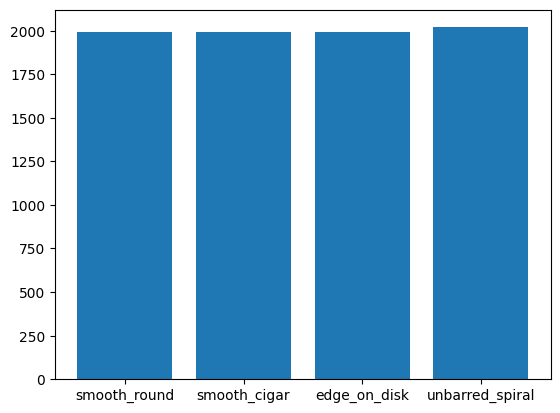

In [10]:
plt.bar(range(len(unique_labels)), count_labels, align='center')
plt.xticks(range(len(unique_labels)), GalaxyMNISTHighrez.classes)
plt.show()

**Exercise 2:**
Count the class frequencies for the testing data, and visualise using a histogram.

In [11]:
### -- Code here --


Now let us take a look at the images of the different galaxy shapes.

In [12]:
from PIL import Image #  PIL is the Python Imaging Library

label: smooth_round


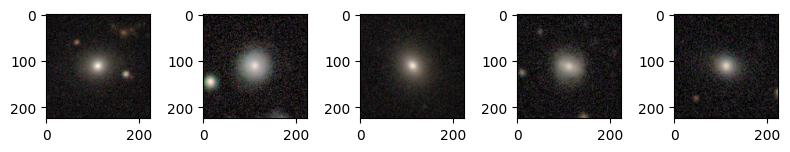

label: smooth_cigar


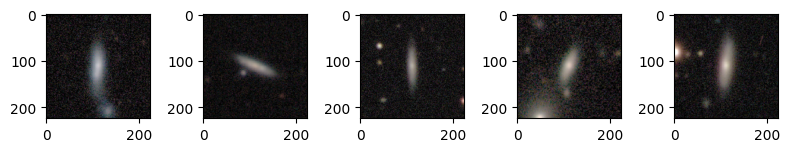

label: edge_on_disk


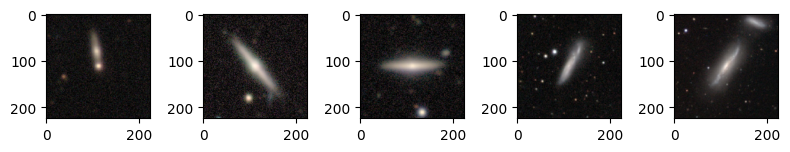

label: unbarred_spiral


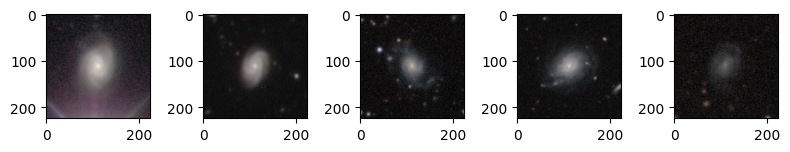

In [13]:
rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_train[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0))
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 

The resolution of this dataset does not seem to be good, `smooth cigar` and `edge_on_disk` kind of look like each other, which will give us problems later on when performing classification or clustering.

---

### Data preprocessing

Classical machine learning usually requires the data to undergo extensive preprocessing before it is fit for training (e.g. feature extraction, optimization, ..). For each layer, many different algorithms may be used. 

On the other hand, deep learning models with enough data are often referred to as End-to-End learning models ([E2E](https://towardsdatascience.com/e2e-the-every-purpose-ml-method-5d4f20dafee4)), since they can extract information from raw data.

In the following tutorial, we will use an autoencoder (deep learning) model to extract features. In theory, we can feed the raw data into the autoencoder without any preprocessing. However, in practice this greatly increases the computation time required. In this tutorial series we need to train the models in a reasonable time so that we can bring the idea across. The issue is especially important because use of raw data optimally requires hyperparameter tuning, which is even more time consuming.

However, preprocessing has a caveat. We need to make sure that the preprocessing does not lose any useful information. How can we verify this? In our case, since the data is imagery data we can examine the preprocessed images visually. If we can still easily classify them, then we can conclude that the preprocessing is effective.

The pipeline we have described above is just one possibility. Participants are encouraged to explore alternatives.

In this tutorial, we will try to reduce the complexity of the data by doing the following:
   - Convert images to grayscale (reduces data by a factor  of 3)
   - Reduce the size of the image by a factor of 4 @@@ InterpolationMode.BILINEAR @@@ Is this okay?

We begin with conversion to grayscale, following this [tutorial](https://www.tutorialspoint.com/pytorch-how-to-convert-an-image-to-grayscale) from [tutorialspoint.com](https://www.tutorialspoint.com).

In [14]:
import torchvision.transforms as transforms #Transforms are for common image transformations

In [15]:
images_train.shape

torch.Size([8000, 3, 224, 224])

We can see that the original image size has three channels which stand for the RGB colours, now let us perfom the `greyscalling`

In [16]:
transformGrey = transforms.Grayscale()
images_trainGrey = transformGrey(images_train)

Now let us check the size of the tensor

In [17]:
images_trainGrey.shape

torch.Size([8000, 1, 224, 224])

we can see the number of channels went down from 3 to 1

**Exercise 3:**
Visualise the grayscale images for all classes

label: smooth_round


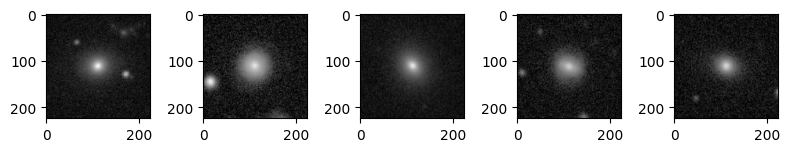

label: smooth_cigar


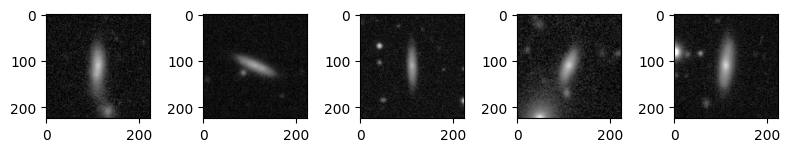

label: edge_on_disk


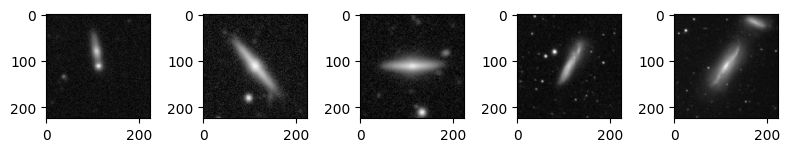

label: unbarred_spiral


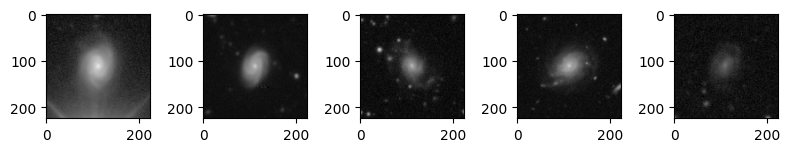

In [18]:
### -- Code here__

rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainGrey[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0) ,cmap='gray', vmin=0, vmax=255)
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 

We can notice that visually that nothing changed much from the original data. However, we reduced the complexity of the data by a favour of 3, which is enormous!

#### b- [Size reduction](https://www.tutorialspoint.com/pytorch-how-to-resize-an-image-to-a-given-size)

In [19]:
transformResize = transforms.Resize(56)

Now let us reduce the image, we will reduce it on the grayscale images

In [20]:
images_trainResized = transformResize(images_trainGrey)

now let us check the size

In [21]:
images_trainResized.shape

torch.Size([8000, 1, 56, 56])

**Exercise 4:**
Visualise the resized images for all classes

label: smooth_round


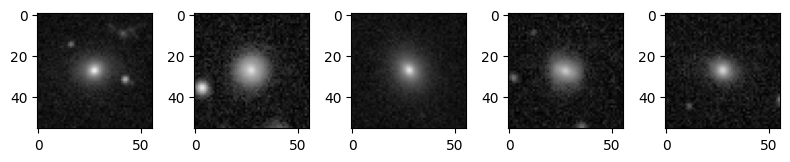

label: smooth_cigar


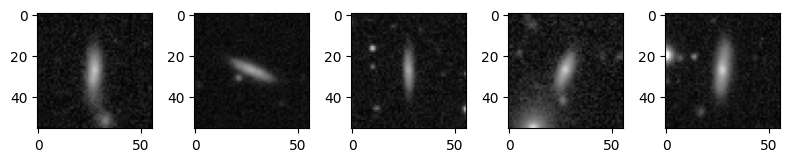

label: edge_on_disk


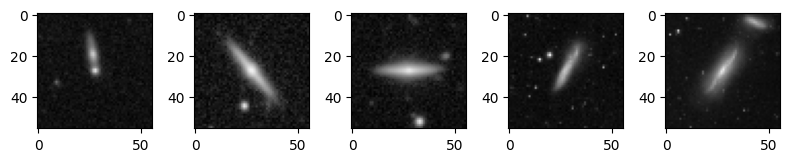

label: unbarred_spiral


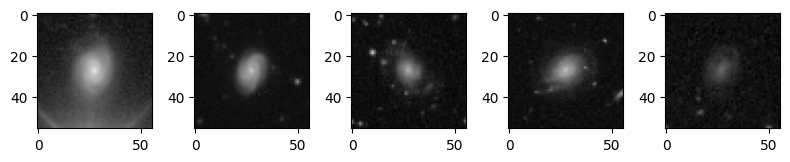

In [22]:
#___ Code here___

rows = 1
columns = 5
for j in range(len(GalaxyMNISTHighrez.classes)):
    fig = plt.figure(figsize=(8, 8))# Figure is 8 inches by 8 inches
    for i in range (columns):    # Create images in each column
        train_image = images_trainResized[(labels_train == j)][i]
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(np.array(train_image).transpose(1, 2, 0) ,cmap='gray', vmin=0, vmax=255)
    print("label: "+str(GalaxyMNISTHighrez.classes[j]))
    plt.tight_layout()
    plt.show() 

##### **_End of the pre-processing pipeline_**

Now the above pre-processing is not the only way where we can reduce the features, the following can also be done:
1. Cropping images away from the centre
2. Image segmentation, maybe to remove background noise (Deep learning can be used for this)
3. ?

### Normalization

Now we will simply try to devide the pixel values by 255. Where the goal is to transform features to be on a similar scale ([source](https://developers.google.com/machine-learning/data-prep/transform/normalization)).

In [23]:
images_trainPre = images_trainResized/255

Now let us check the values before and after the nomalisatiom

In [26]:
print(images_trainResized[0][0][0])
print(images_trainPre[0][0][0])

tensor([24, 35, 16, 27, 11, 20,  7, 15, 15, 19, 14, 11,  5, 15, 37, 25, 17, 22,
        12, 22, 12,  6, 20,  5, 18, 15, 14, 31, 14, 12, 27, 18, 28, 22, 25, 17,
        25,  6,  5, 26, 22,  2, 14, 12, 14,  7, 16, 26, 12, 19, 13, 34, 36, 17,
        13, 20], dtype=torch.uint8)
tensor([0.0941, 0.1373, 0.0627, 0.1059, 0.0431, 0.0784, 0.0275, 0.0588, 0.0588,
        0.0745, 0.0549, 0.0431, 0.0196, 0.0588, 0.1451, 0.0980, 0.0667, 0.0863,
        0.0471, 0.0863, 0.0471, 0.0235, 0.0784, 0.0196, 0.0706, 0.0588, 0.0549,
        0.1216, 0.0549, 0.0471, 0.1059, 0.0706, 0.1098, 0.0863, 0.0980, 0.0667,
        0.0980, 0.0235, 0.0196, 0.1020, 0.0863, 0.0078, 0.0549, 0.0471, 0.0549,
        0.0275, 0.0627, 0.1020, 0.0471, 0.0745, 0.0510, 0.1333, 0.1412, 0.0667,
        0.0510, 0.0784])


**Exercise 5**: Perform the pre-processing pipeline but on the testing set

In [27]:
#___ Code here___


---

### **_End of Tutorial 1_**